In [1]:
import numpy as np  
import os
import matplotlib.pyplot as plt  

In [2]:
__errors__ = []

archivo_csv = 'Salary_dataset.csv'
samples_g = []
y = []
params = [2,0.3]

with open(archivo_csv, 'r') as file:
    lines = file.readlines()
    for line in lines[1:]:  # Omitir la primera línea si es un encabezado
        columns = line.strip().split(',')
        samples_g.append(float(columns[1]))  # Reemplaza el índice con la columna que deseas
        y.append(float(columns[2]))  # Reemplaza el índice con la otra columna que deseas

samples = samples_g.copy()
        
#Multivariable
#samples = [[1,1,1],[2,2,2],[3,3,3]]
#samples = [[1,2,3],[4,5,6],[7,8,9],[1,1,1]]
#y = [60, 55, 50,50]
#params = [.3,2,1]

#Univariable
#params = [2,0.3]
#samples = [59,44,51,42]
#y = [60,55,50,66]

print("Samples: ",samples)
for i in range(len(samples)):
    if isinstance(samples[i], list):
        samples[i]=  [1]+samples[i]
    else:
        samples[i]=  [1,samples[i]]

#samples = scaling(samples)
#print ("Samples: ",samples)

Samples:  [1.2000000000000002, 1.4000000000000001, 1.6, 2.1, 2.3000000000000003, 3.0, 3.1, 3.3000000000000003, 3.3000000000000003, 3.8000000000000003, 4.0, 4.1, 4.1, 4.199999999999999, 4.6, 5.0, 5.199999999999999, 5.3999999999999995, 6.0, 6.1, 6.8999999999999995, 7.199999999999999, 8.0, 8.299999999999999, 8.799999999999999, 9.1, 9.6, 9.7, 10.4, 10.6]


In [3]:
def GDD(params, samples, y, alpha = 0.01):
    samples = np.array(samples)
    params = np.array(params)
    y = np.array(y)
    aux = params.copy()

    error = (params * samples)
    print("\nMatrix con las multiplicacion de parametros individuales y = tx1 + tx2 + ... : ",error) 
    error = error.sum(axis = 1)
    print("\nMatrix con la suma de las multiplicacion de parametros individuales y = tx1 + tx2 + ... = : ",error) 
    error = error - y
    print("\nMatrix con la resta de cada uno de estos valores menos el real: ",error) 
    error = error * samples.T
    print(samples.T)
    print("\nMatrix con la multiplicación de los errores por su sample: ",error) 
    error = error.sum(axis = 1)
    print("\nMatrix con la suma de la multiplicación de los errores por su parametro: ",error)
    aux = params - alpha*(1/len(samples))*error
    print("\nParametros viejos: ",params)
    print("\nParametros nuevos: ",aux)
    return aux

In [4]:
def errors(params, samples, y):
    samples = np.array(samples)
    params = np.array(params)
    y = np.array(y)
    aux = params.copy()
    
    error = (params * samples)
    #print("\nMatrix con las multiplicacion de parametros individuales y = tx1 + tx2 + ... : ",error) 
    error = error.sum(axis = 1)   
    #print("\nMatrix con la suma de las multiplicacion de parametros individuales y = tx1 + tx2 + ... = : ",error) 
    error = error - y
    #print("\nMatrix con la resta de cada uno de estos valores menos el real: ",error) 
    error = error ** 2
    #print("\nError al cuadrado: ",error)
    error = error.sum()/2*len(samples)
    #print(error)
    __errors__.append(error)
    return error

In [5]:
epochs = 0
for i in range(100):
    print(params)
    errors(params, samples, y)
    params = GDD(params, samples, y)
    

[2, 0.3]

Matrix con las multiplicacion de parametros individuales y = tx1 + tx2 + ... :  [[2.   0.36]
 [2.   0.42]
 [2.   0.48]
 [2.   0.63]
 [2.   0.69]
 [2.   0.9 ]
 [2.   0.93]
 [2.   0.99]
 [2.   0.99]
 [2.   1.14]
 [2.   1.2 ]
 [2.   1.23]
 [2.   1.23]
 [2.   1.26]
 [2.   1.38]
 [2.   1.5 ]
 [2.   1.56]
 [2.   1.62]
 [2.   1.8 ]
 [2.   1.83]
 [2.   2.07]
 [2.   2.16]
 [2.   2.4 ]
 [2.   2.49]
 [2.   2.64]
 [2.   2.73]
 [2.   2.88]
 [2.   2.91]
 [2.   3.12]
 [2.   3.18]]

Matrix con la suma de las multiplicacion de parametros individuales y = tx1 + tx2 + ... = :  [2.36 2.42 2.48 2.63 2.69 2.9  2.93 2.99 2.99 3.14 3.2  3.23 3.23 3.26
 3.38 3.5  3.56 3.62 3.8  3.83 4.07 4.16 4.4  4.49 4.64 4.73 4.88 4.91
 5.12 5.18]

Matrix con la resta de cada uno de estos valores menos el real:  [ -39341.64  -46203.58  -37729.52  -43523.37  -39889.31  -56640.1
  -60148.07  -54443.01  -64443.01  -57186.86  -63215.8   -55791.77
  -56954.77  -57078.74  -61108.62  -67935.5   -66026.44  -83085.38
  -81

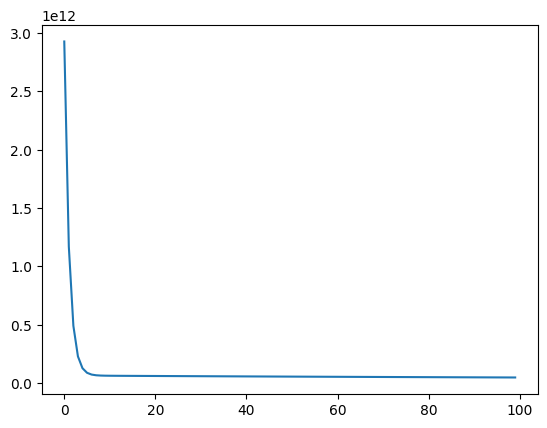

In [6]:
plt.plot(__errors__)
plt.show()

In [7]:
x = params * samples
x = x.sum(axis = 1)


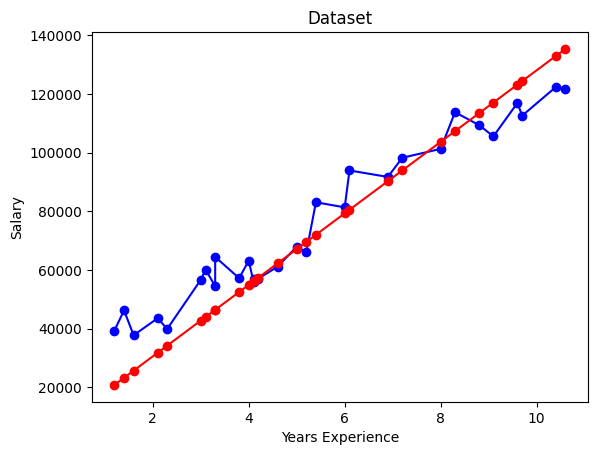

In [8]:
plt.plot(samples_g, y, marker='o', linestyle='-', color='b', label='Datos')
plt.xlabel('Years Experience')
plt.plot(samples_g, x, marker='o', linestyle='-', color='r', label='Datos')
plt.ylabel('Salary')
plt.title('Dataset')
plt.show()